In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### график первый 
Датасет со всеми героями из Game of Thrones, которые умерли.
Рассчитываю количество смертей по домам (там как прямые члены семьи, так и те, кто погиб за них). 
Такой график покажет, в каких домах больше умерло героев за все части по сравнению с другими домами. Считаю сколько в каждом доме умерло и делаю bar chart

In [77]:
df = pd.read_csv('character-deaths.csv')
df = df[['Name', 'Allegiances', 'Gender', 'Nobility']]

df.head()

,Name,Allegiances,Gender,Nobility
0,Addam Marbrand,Lannister,1,1
1,Aegon Frey (Jinglebell),None,1,1
2,Aegon Targaryen,Targaryen,1,1
3,Adrack Humble,Greyjoy,1,1
4,Aemon Costayne,Lannister,1,1


In [78]:
df_houses = df.groupby('Allegiances').Name.count().reset_index()
df_houses

,Allegiances,Name
0,Baratheon,64
1,Greyjoy,75
2,House Arryn,30
3,Lannister,102
4,Martell,37
5,Night's Watch,116
6,None,253
7,Stark,108
8,Targaryen,36
9,Tully,30


D:\progs\conda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


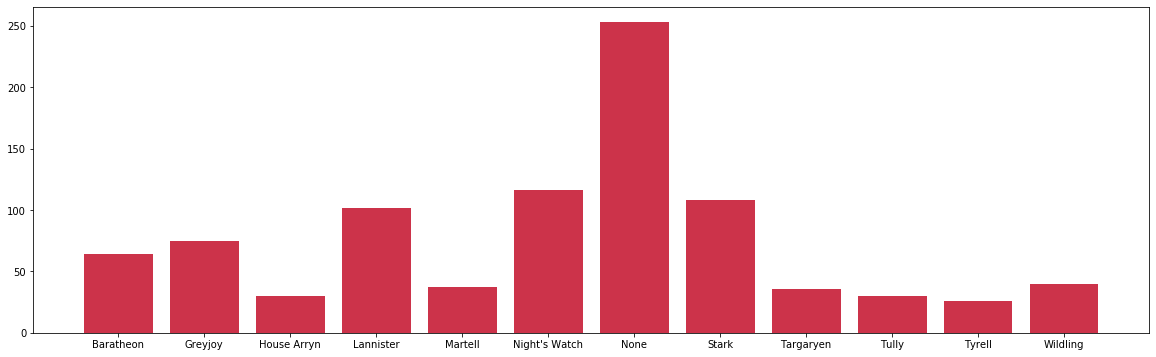

In [79]:
plt.figure(figsize = (20, 6))
plt.bar(range(len(df_houses.Allegiances)), df_houses.Name, color = (0.8, 0.2, 0.29, 1))
ax = plt.subplot()
ax.set_xticks(range(len(df_houses)))
ax.set_xticklabels(df_houses['Allegiances'])
                    
plt.show()

### график второй 
Cчитаю процент знати по домам. На таком графике тоже хорошо можно сравнить проценты знати в каждом доме.

В этом датасете в Nobility 1 - знатный человек, 0 - простой человек.
В Gender 1 - мужчина, а 0 - женщина.


In [6]:
n_of_nobles = df.groupby('Allegiances').Nobility.sum().reset_index() #количество знати
n_of_people = df.groupby('Allegiances').Gender.count().reset_index()
df_nobles = n_of_nobles.merge(n_of_people, on = 'Allegiances')


df_nobles['percentage'] = (df_nobles.Nobility / df_nobles.Gender) * 100
df_nobles

,Allegiances,Nobility,Gender,percentage
0,Baratheon,47,64,73.437500
1,Greyjoy,37,75,49.333333
2,House Arryn,20,30,66.666667
3,Lannister,66,102,64.705882
4,Martell,25,37,67.567568
5,Night's Watch,11,116,9.482759
6,None,93,253,36.758893
7,Stark,69,108,63.888889
8,Targaryen,10,36,27.777778
9,Tully,21,30,70.000000


Text(0, 0.5, 'House')

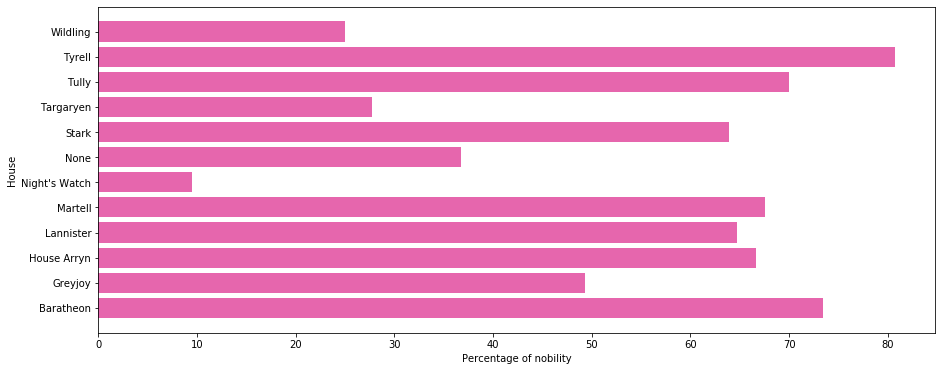

In [75]:
plt.figure(figsize = (15, 6))
ax = plt.subplot()
plt.barh(range(len(df_nobles.Allegiances)), df_nobles.percentage, color = (0.9, 0.4, 0.68, 1))
ax.set_yticks(range(len(df_nobles.Allegiances)))
ax.set_yticklabels(df_nobles.Allegiances)
plt.xlabel('Percentage of nobility')
plt.ylabel('House')

### График 3
Меняю датасет на Олимпийские игры, потому что все графики с предыдущим датасетом получаются однотипными.

Третий график: показывает зависимость возраста, веса и роста. Видно распределение также распределение данных в этих категориях.
Например, по графику видно, как коррелируют вес и рост. 

In [8]:
new_df = pd.read_csv('athlete_events.csv')
new_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


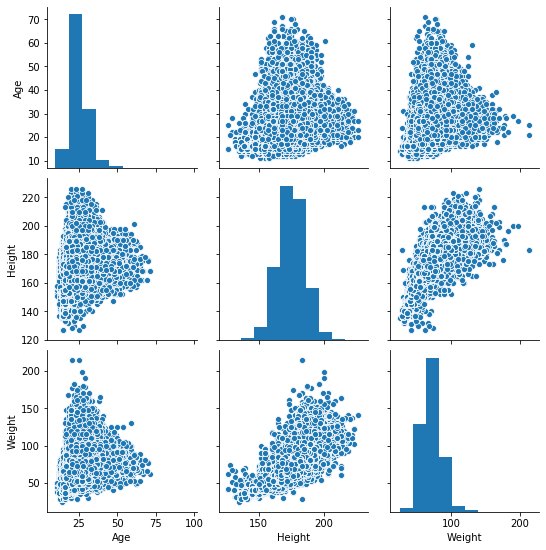

In [9]:
sns_plot = sns.pairplot(new_df[['Age', 'Height', 'Weight']])

### График 4

Смотрюю по годам сколько женщин и сколько мужчин принимали участие в Олимпийских играх.
На таком графике будет лучше всего видно распределение по годам.


In [10]:
women = new_df[new_df.Sex == 'F']
men =  new_df[new_df.Sex == 'M']
women = women.groupby('Year').Name.count().reset_index()
men = men.groupby('Year').Name.count().reset_index()

women.head()

,Year,Name
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


D:\progs\conda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


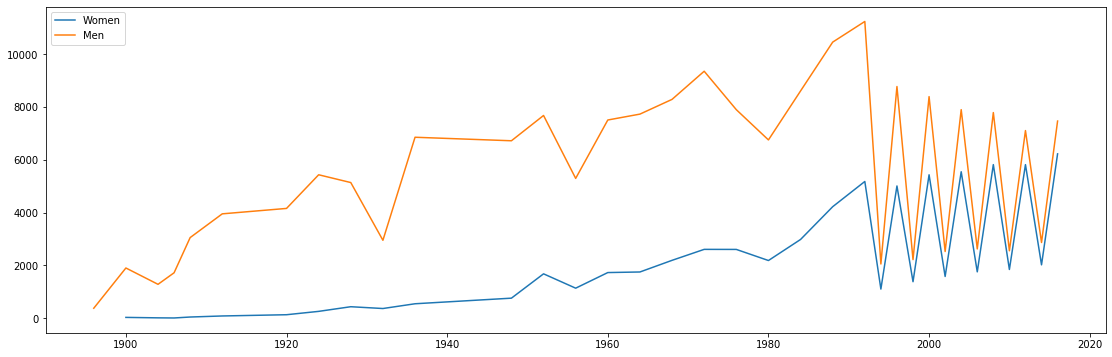

In [11]:
plt.figure(figsize = (19, 6))

plt.plot(women.Year, women.Name)
plt.plot(men.Year, men.Name)

ax = plt.subplot()
ax.legend(['Women', 'Men'], loc = 'upper left')


# до 1996 года летние и зимние игры были в один год, поэтому это скорее всего и причина, почему график так меняется,
# но мужчин все равно остается в играх гораздо больше

### График 5

Боксплот для городов, в которых за все годы было больше всего участников, для распределния их возрастов. 
Интересно, что в Лондоне были и участники за 70 лет.

In [61]:
cities = new_df.groupby('City').Name.count().sort_values(ascending = False).head(5).reset_index()

data_cities = new_df[new_df.City.isin(cities.City)]

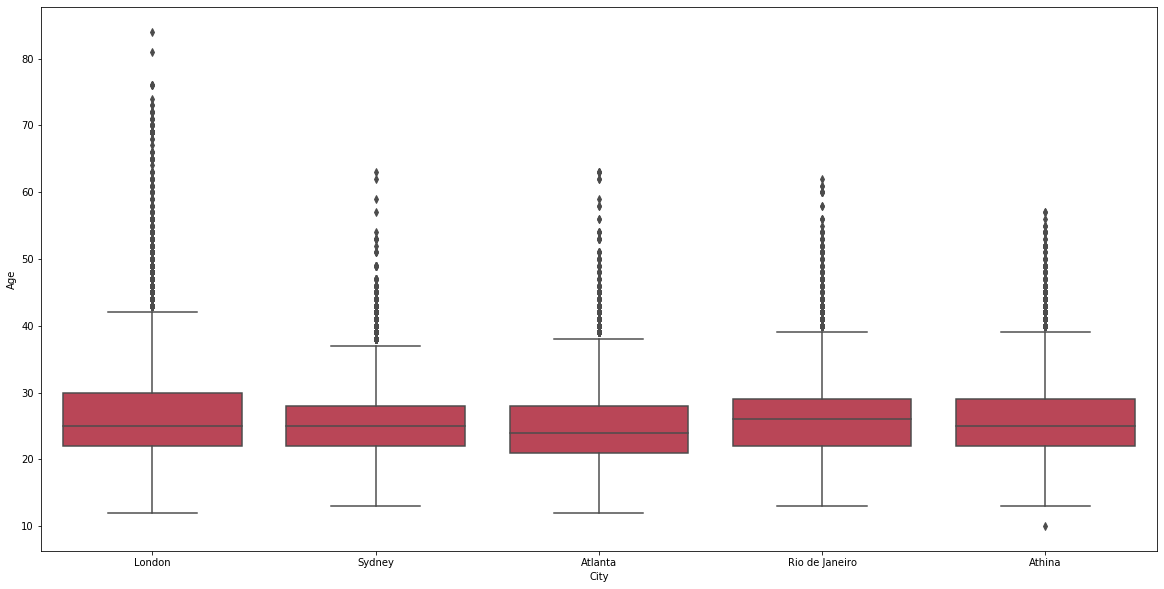

In [64]:
plt.figure(figsize=(20,10))

sns.boxplot(data=data_cities, x='City', y='Age', color = (0.8, 0.2, 0.29, 0.7))

### График 6

Распределение веса участников игр

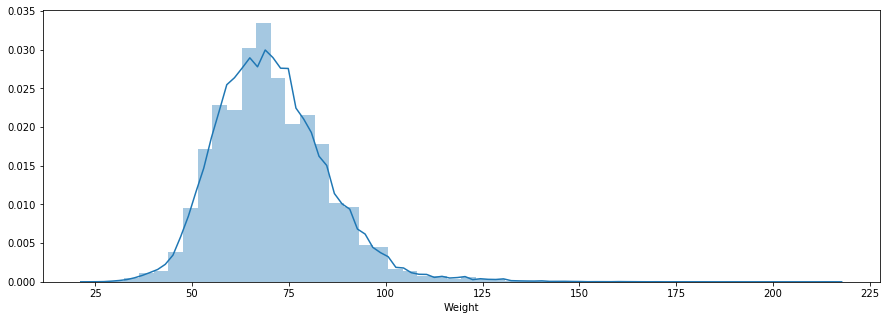

In [44]:
plt.figure(figsize=(15,5))
sns.distplot(new_df.Weight)